# DS-SF-36 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')


import seaborn as sns


C:\Users\Jagupta\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [8]:
df.count()# TODO


,gre,gpa,prestige
admit,,,
0,271,272,273
1,127,126,126


In [9]:
df.groupby('admit').count()

,gre,gpa,prestige
admit,,,
0,271,272,273
1,127,126,126


Answer: TODO

> ### Question 2.  Create a summary table.

In [4]:
df.describe()# TODO

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

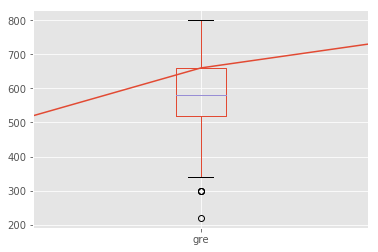

In [20]:
# in aboslute terms becuase gpa are ;arger and can have a larger spread. 
df.gre.plot()# TODO
df.gre.plot(kind='box')# TODO



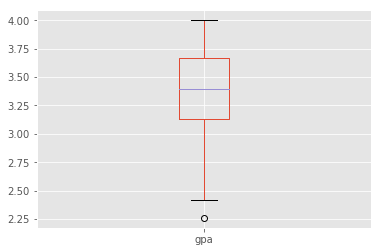

In [18]:
#df.gpa.plot()# TODO
df.gpa.plot(kind='box')# TODO

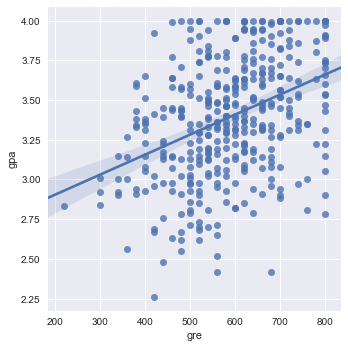

In [23]:
sns.lmplot(x = 'gre', y = 'gpa', data = df)

Answer: TODO

> ### Question 4.  Drop data points with missing data.

In [32]:
df.isnull().sum()
df=df.dropna()



admit       0
gre         0
gpa         0
prestige    0
dtype: int64

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [ ]:
df.isnull().sum()

Answer: TODO

> ### Question 6.  Create boxplots for `gre` and `gpa`.

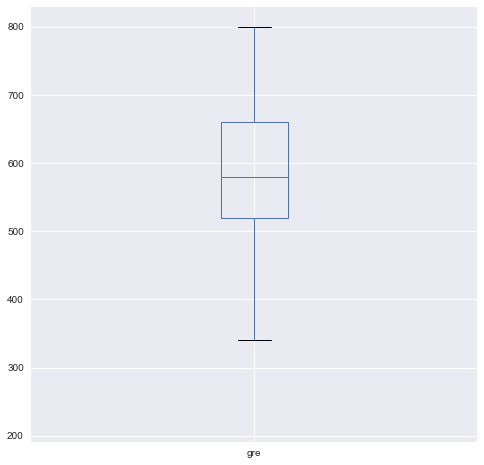

In [33]:
df.gre.plot(kind = 'box', figsize = (8, 8))

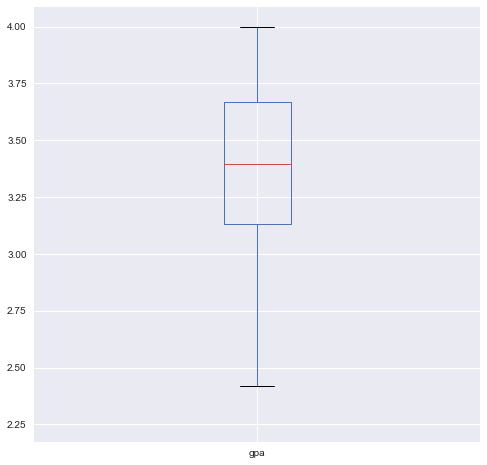

In [34]:
df.gpa.plot(kind = 'box', figsize = (8, 8))# TODO

> ### Question 7.  What do boxplots show?

Answer: TODO

> ### Question 8.  Plot the distribution of each variable.

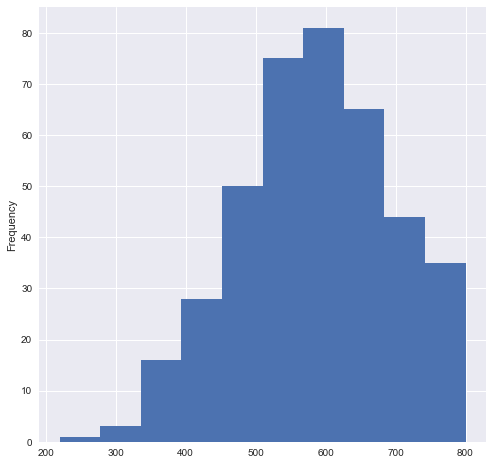

In [39]:
df.gre.plot(kind = 'hist', figsize = (8, 8))

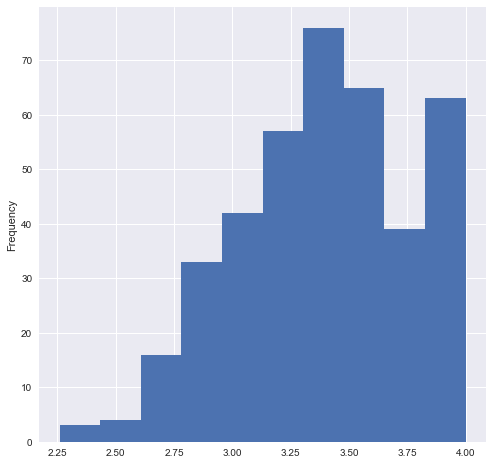

In [40]:
df.gpa.plot(kind = 'hist', figsize = (8, 8))

In [45]:
#df.prestige.plot(kind = 'hist', figsize = (8, 8))
df.groupby('prestige').count()

,admit,gre,gpa
prestige,,,
1.0,61,61,61
2.0,150,148,149
3.0,121,121,121
4.0,67,67,67


In [47]:
df.groupby('admit').mean()
# add two color

,gre,gpa,prestige
admit,,,
0,573.579336,3.345404,2.641026
1,618.897638,3.489206,2.150794


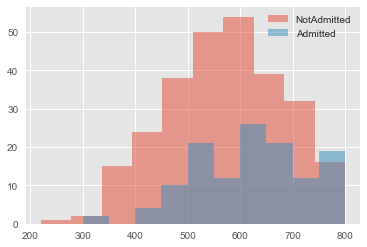

In [66]:
x = df[df['admit']==0].gre
y = df[df['admit']==1].gre

#bins = np.linspace(-500, 10, 500)
x.hist(alpha=0.5, label='NotAdmitted')
y.hist(alpha=0.5, label='Admitted')
plt.legend(loc='upper right')
plt.show()


# we see higher gre scores have higher ratio of admits and lower not admits.
#ALthough admits are not too skewed to higher GRes..and are distributed fairly evenly 500+

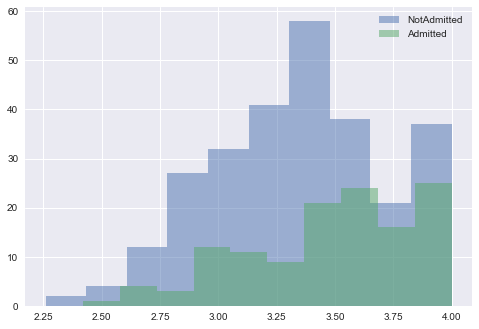

In [4]:
x = df[df['admit']==0].gpa
y = df[df['admit']==1].gpa

x.hist(alpha=0.5, label='NotAdmitted')
y.hist(alpha=0.5, label='Admitted')
plt.legend(loc='upper right')
plt.show()

# we see higher GPAs have higher ratio of admits and lower not admits

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [ ]:
#yes both are not normally distributed...there is a longer tail on the left than right. 

In [ ]:
# TODO

Answer: TODO

> ### Question 10.  Create a correlation matrix for the dataset.

In [36]:
df.corr()# TODO

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: None of hte variables are very clearly collinear

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: we will run a model to identify whether prestige of undergrad has any impact of admissions givern gpas and gre scores are constant.  

> ### Question 13.  What is your hypothesis?

Answer: prestige should have no impact on the fraducate school admissions as long as gre and gpas are good